# Digital Service User Behavior and Churn Analysis

---

### Project Information
**Course:** Data Science Project 

**Project Title:** Enhancing Customer Churn Prediction through Behavioral Segmentation and Socioeconomic Insights in E-Commerce Platforms

**Semester:** Semester C 

**Academic Year:** 2024-2025

---

### Student Details
**Student Name:** Wasif Shah

**Student ID:** 23121759 

**Program:** Msc Data Science

**University:** University of Herts 

### Supervisor Information
**Supervisor:** Dr. Avinash Yadav  

**Email:** a.yadav2@herts.ac.uk 

---

### Project Overview
This notebook presents a comprehensive exploratory data analysis of digital service customer data to understand user behavior patterns and identify factors contributing to customer churn. The analysis focuses on:

1. **Data Exploration and Quality Assessment**
2. **Statistical Analysis of Customer Behavior**
3. **Customer Segmentation using K-means Clustering**
4. **Visualization of Key Patterns and Trends**
5. **Feature Analysis for Churn Prediction**

---

### Research Questions Addressed
1. How can we group digital service users based on their usage habits to understand who might leave the platform?

2. Does knowing a customer's background (like demographics or service tier) help us predict if they will stop using a digital service platform?

3. Can combining usage patterns and personal profiles improve how well we can predict which customers are at risk of leaving?

---

### Methodology
- **Data Source:** Customer Churn Dataset
- **Analysis Tools:** Python, Pandas, NumPy, Matplotlib, Seaborn
- **Clustering Algorithm:** K-means with optimal cluster determination
- **Statistical Methods:** Correlation analysis, distribution analysis

### Expected Outcomes
- Identification of distinct customer segments
- Understanding of usage patterns across different customer groups
- Insights into factors influencing customer churn
- Foundation for predictive modeling in subsequent notebooks




## **Part 1: Exploratory Data Analysis and Customer Segmentation**

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 8)

print('Libraries imported successfully!')

Libraries imported successfully!


## 1. Data Loading and Initial Inspection

In [10]:
# Load the dataset
df = pd.read_csv('Customer Churn.csv')

print('DIGITAL SERVICE USER BEHAVIOR ANALYSIS')
print('=' * 40)
print(f'Dataset shape: {df.shape}')
print(f'Columns: {list(df.columns)}')


DIGITAL SERVICE USER BEHAVIOR ANALYSIS
Dataset shape: (3150, 14)
Columns: ['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age', 'Customer Value', 'Churn']


In [4]:
# Display first few rows
print('\nFirst 5 rows:')
df.head()


First 5 rows:


,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [9]:
# Dataset information
print('📈 DATASET OVERVIEW:')
print('=' * 23)
print(df.info())

📈 DATASET OVERVIEW:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: f

In [8]:
print('\n STATISTICAL SUMMARY:')
print('=' * 22)
df.describe()


 STATISTICAL SUMMARY:


,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [13]:
# Check for missing values
print(' DATA QUALITY ASSESSMENT:')
print('=' * 30)
missing_values = df.isnull().sum()
print('Missing values per column:')
if missing_values.sum() == 0:
    print(' No missing values found!')
else:
    print(missing_values[missing_values > 0])

 DATA QUALITY ASSESSMENT:
Missing values per column:
 No missing values found!


In [15]:
# Check data types
print('\n Data Types:')
print('=' * 20)
print(df.dtypes)


 Data Types:
Call  Failure                int64
Complains                    int64
Subscription  Length         int64
Charge  Amount               int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                    int64
Tariff Plan                  int64
Status                       int64
Age                          int64
Customer Value             float64
Churn                        int64
dtype: object


## 2. Target Variable Analysis

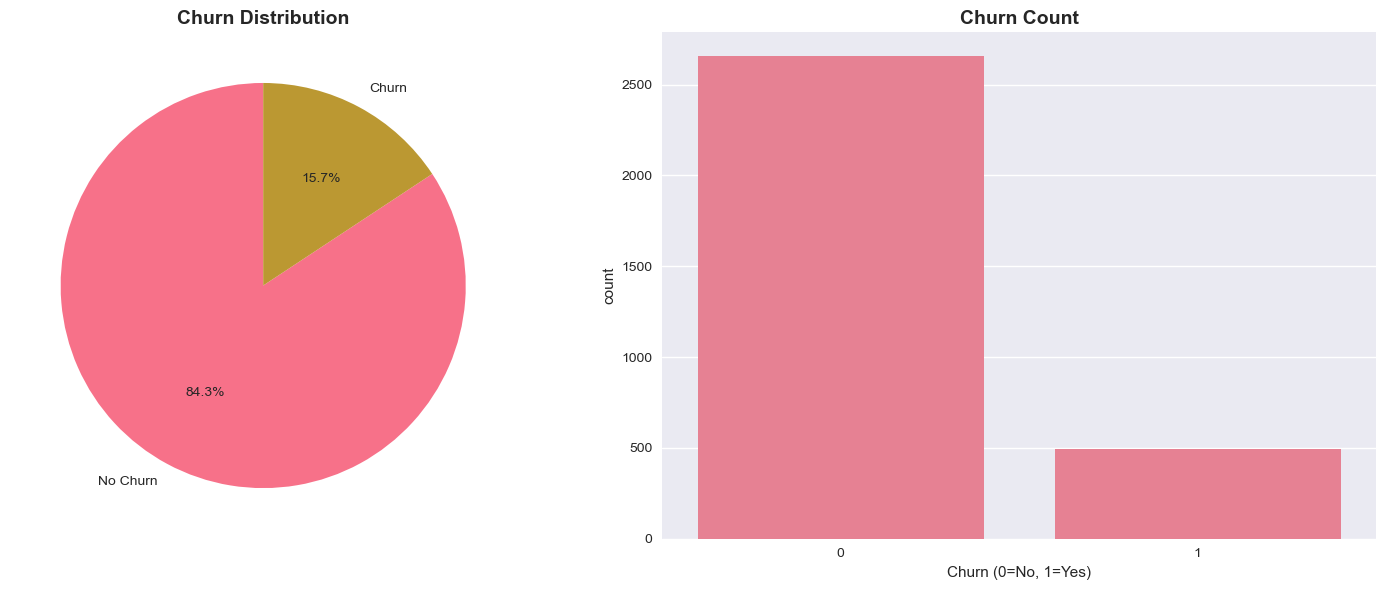

Churn Rate: 15.71%
Total Customers: 3,150
Churned Customers: 495
Retained Customers: 2,655


In [ ]:
# Churn distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Churn count
churn_counts = df['Churn'].value_counts()
axes[0].pie(churn_counts.values, labels=['No Churn', 'Churn'], autopct='%1.1f%%', startangle=90)
axes[0].set_title('Churn Distribution', fontweight='bold', fontsize=14)

# Churn bar plot
sns.countplot(data=df, x='Churn', ax=axes[1])
axes[1].set_title('Churn Count', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Churn (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

print(f'Churn Rate: {df["Churn"].mean():.2%}')
print(f'Total Customers: {len(df):,}')
print(f'Churned Customers: {df["Churn"].sum():,}')
print(f'Retained Customers: {(df["Churn"] == 0).sum():,}')

## 3. Numerical Features Analysis

In [18]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.drop('Churn')
print(f'Numerical features: {list(numerical_cols)}')

Numerical features: ['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age', 'Customer Value']


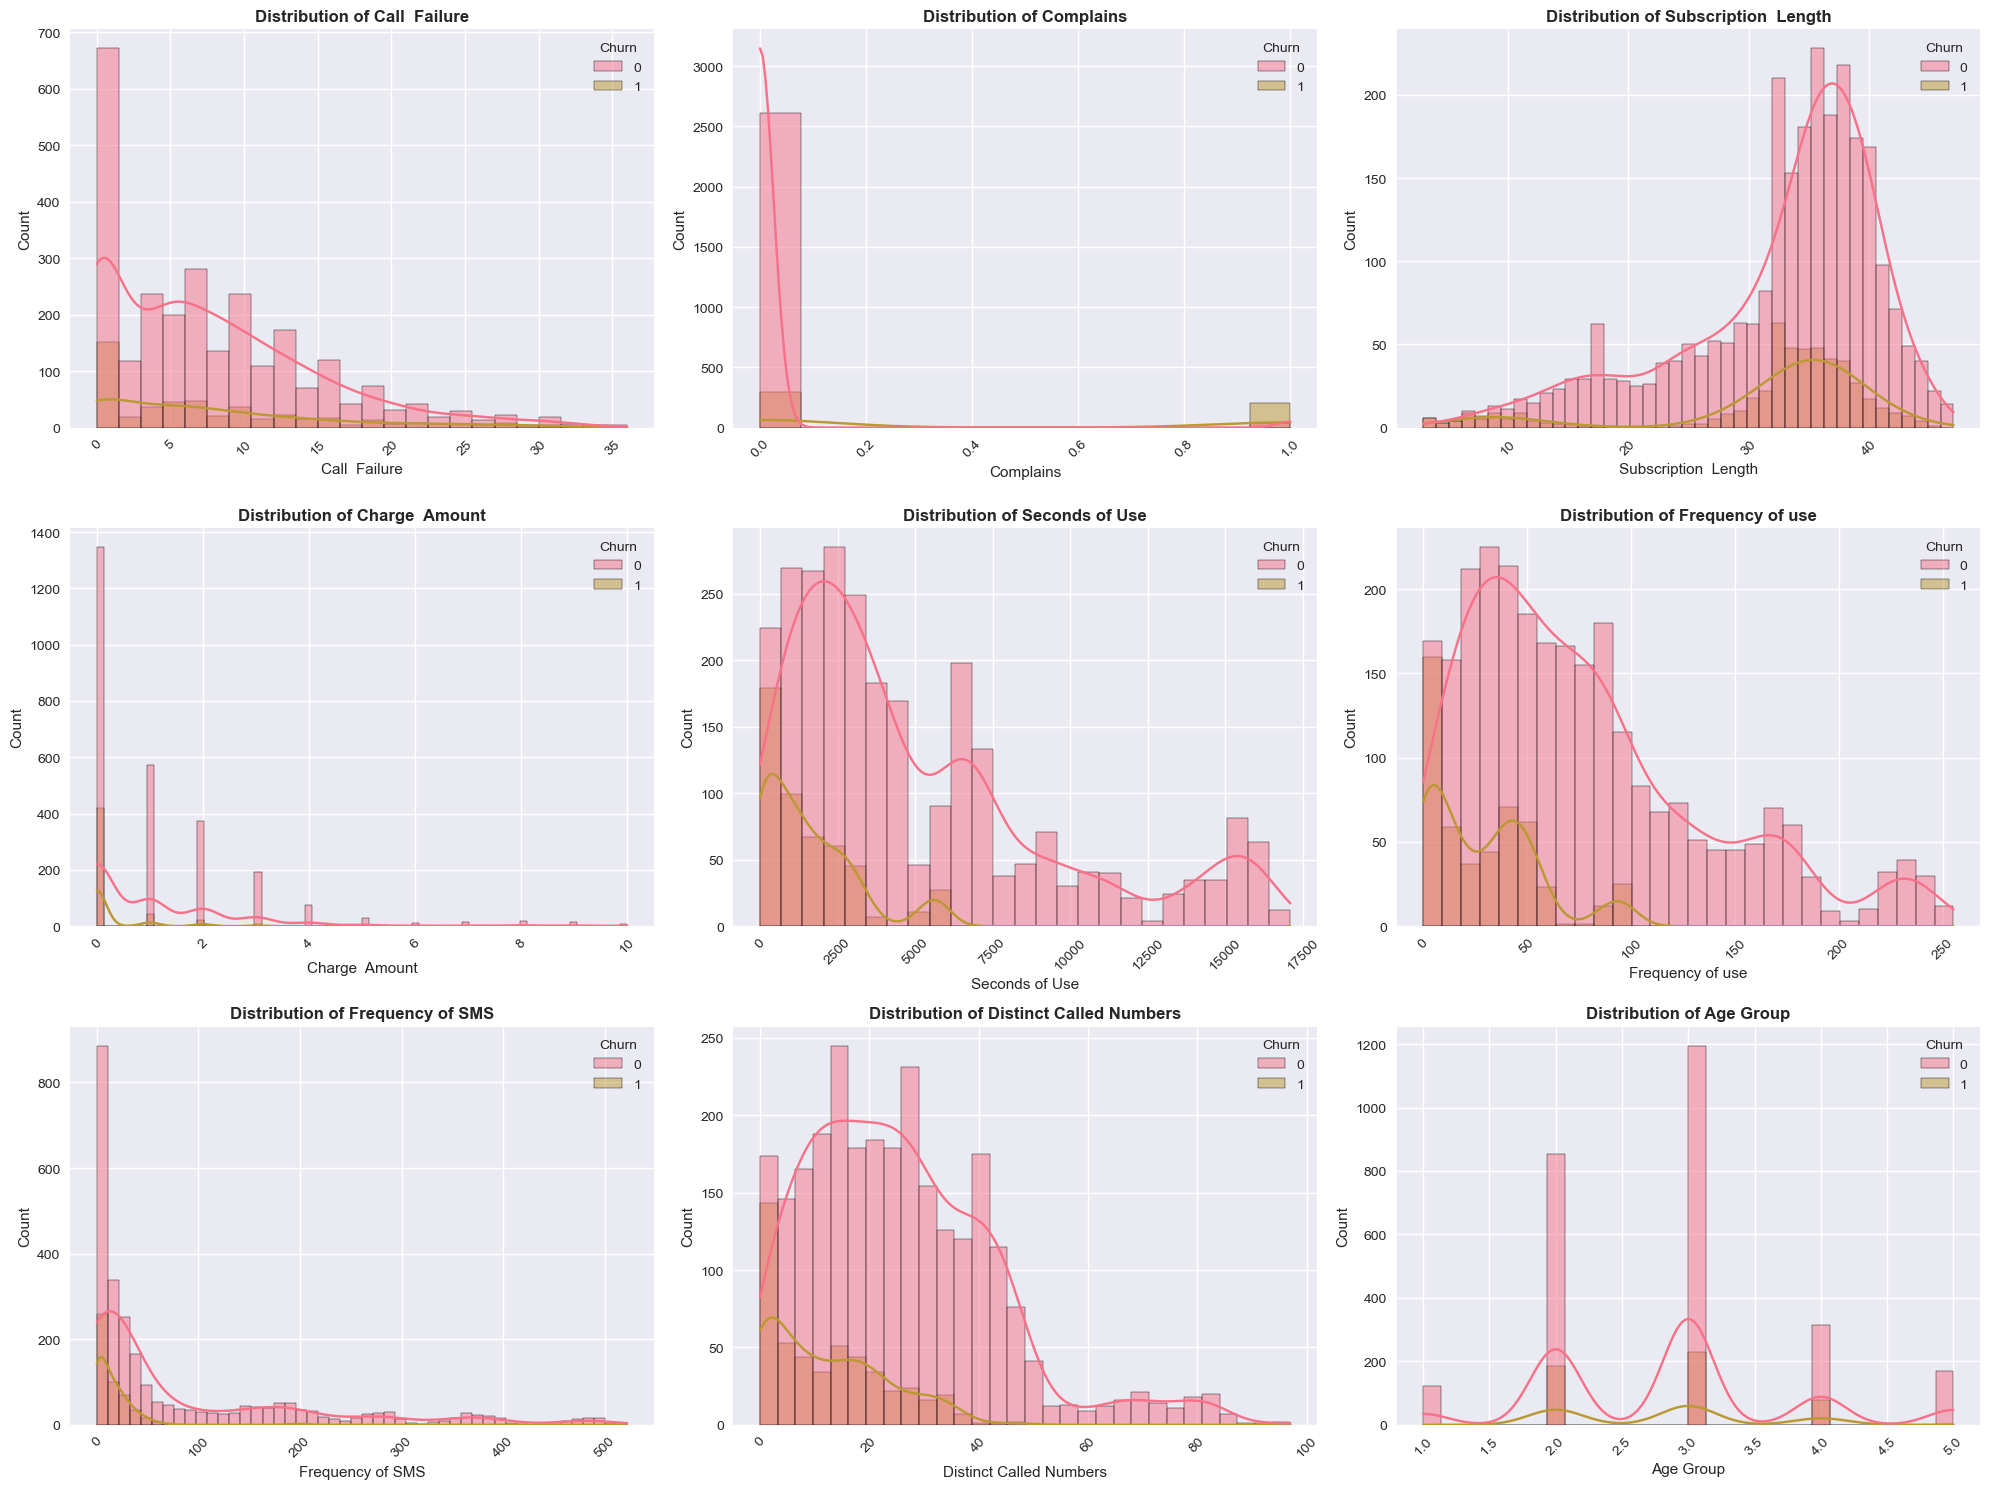

In [19]:
# Distribution plots
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

for i, col in enumerate(numerical_cols[:9]):
    sns.histplot(data=df, x=col, hue='Churn', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

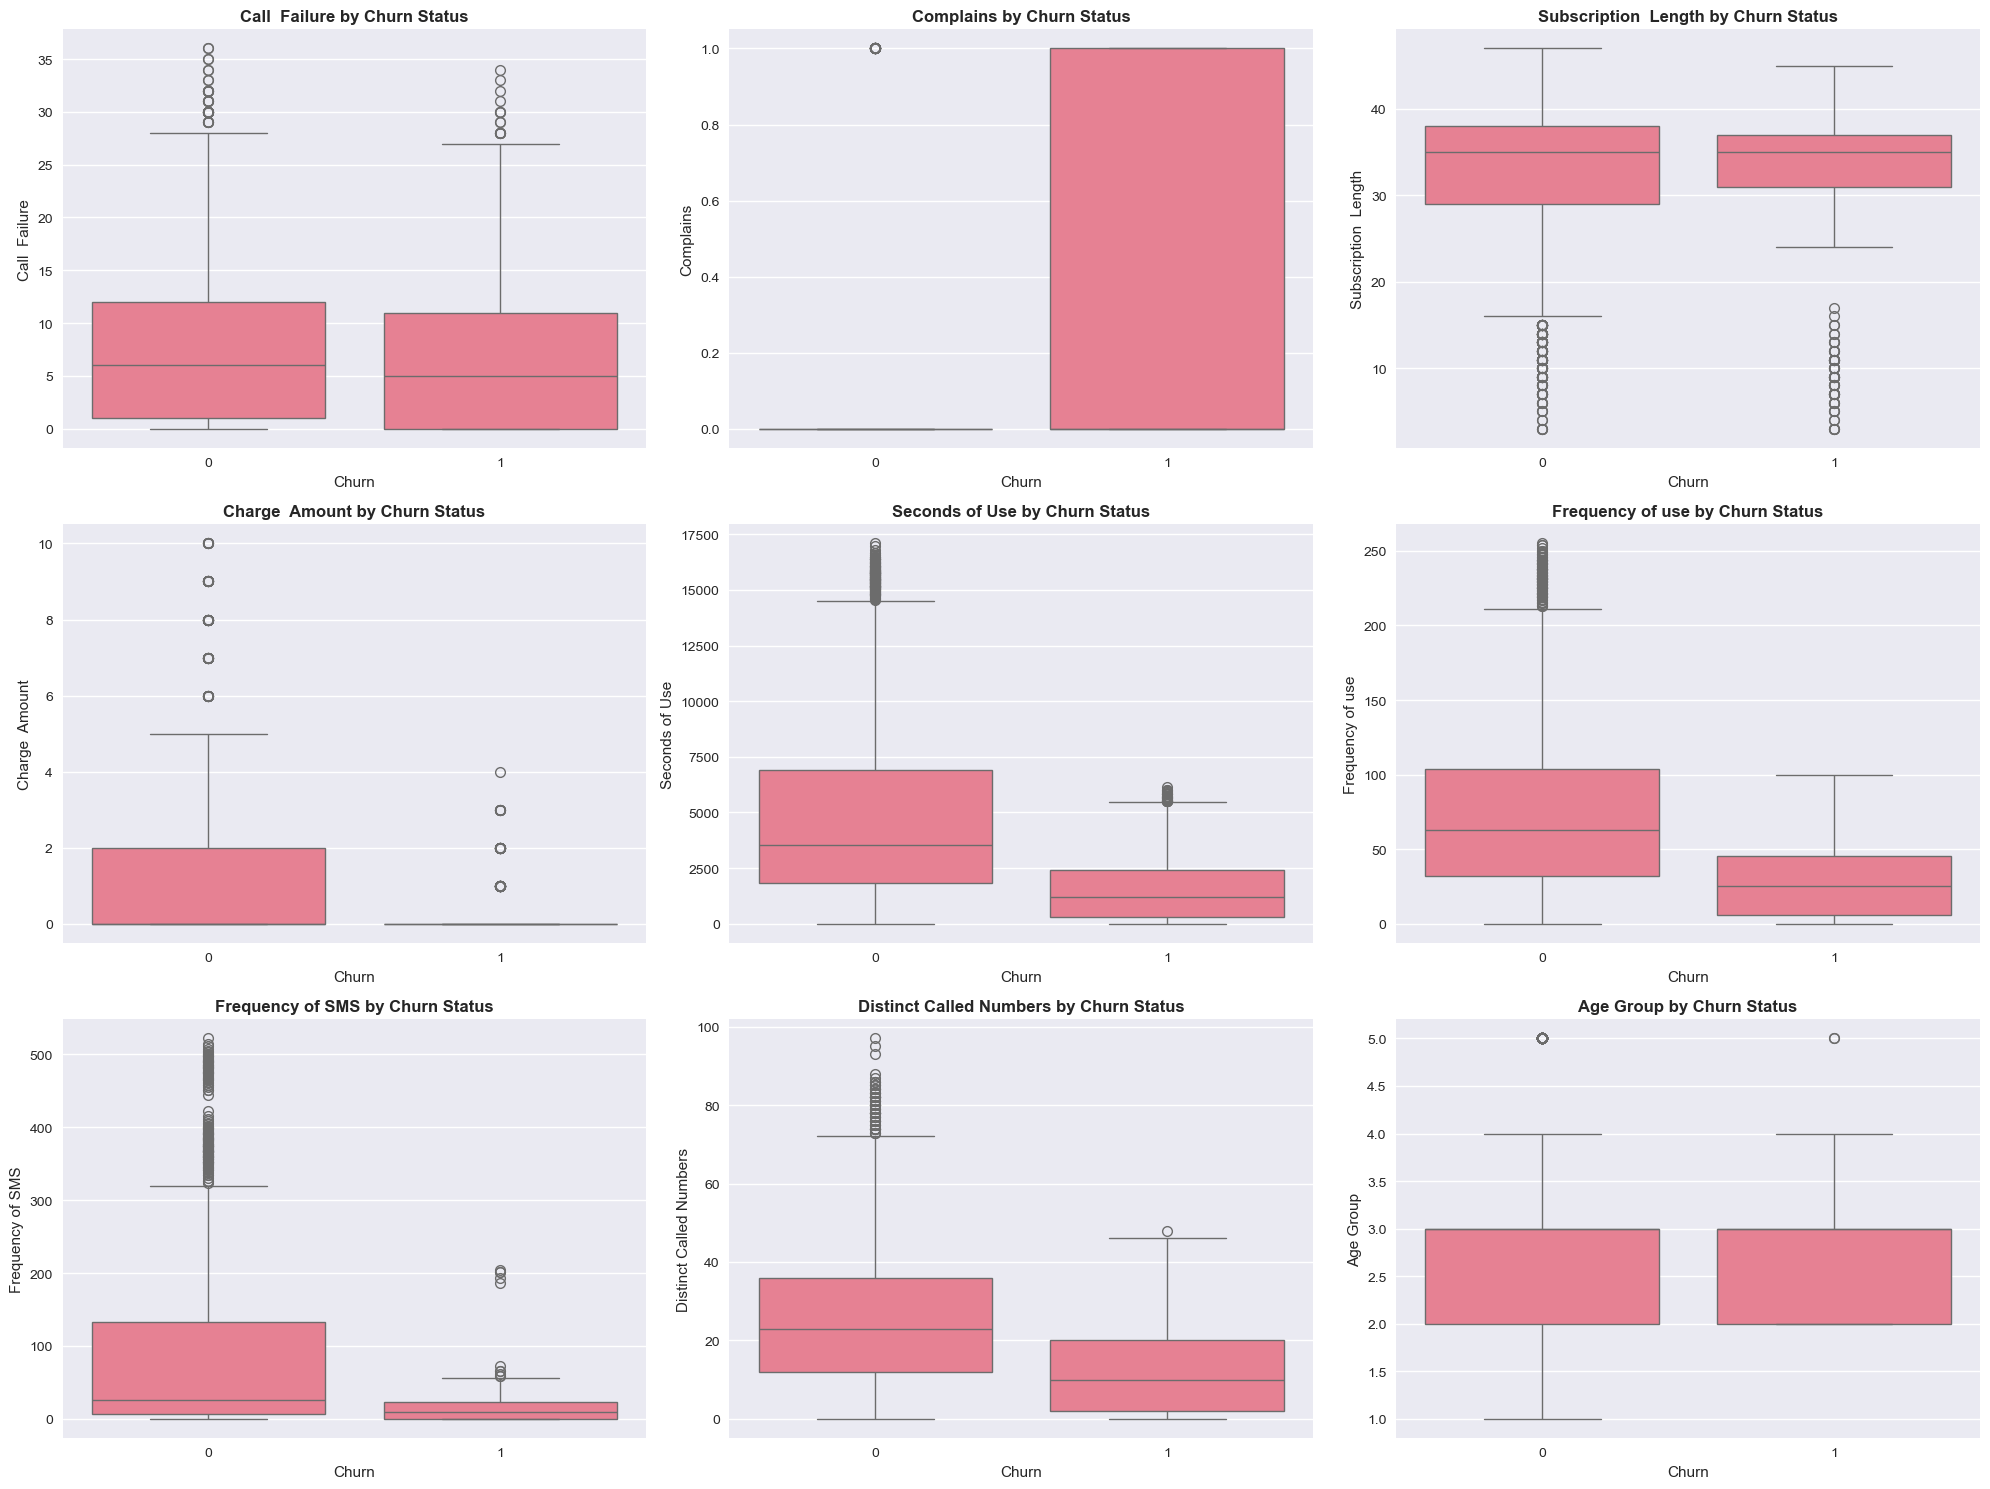

In [7]:
# Box plots for numerical features
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

for i, col in enumerate(numerical_cols[:9]):
    sns.boxplot(data=df, x='Churn', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by Churn Status', fontweight='bold')

plt.tight_layout()
plt.show()

## 4. Categorical Features Analysis

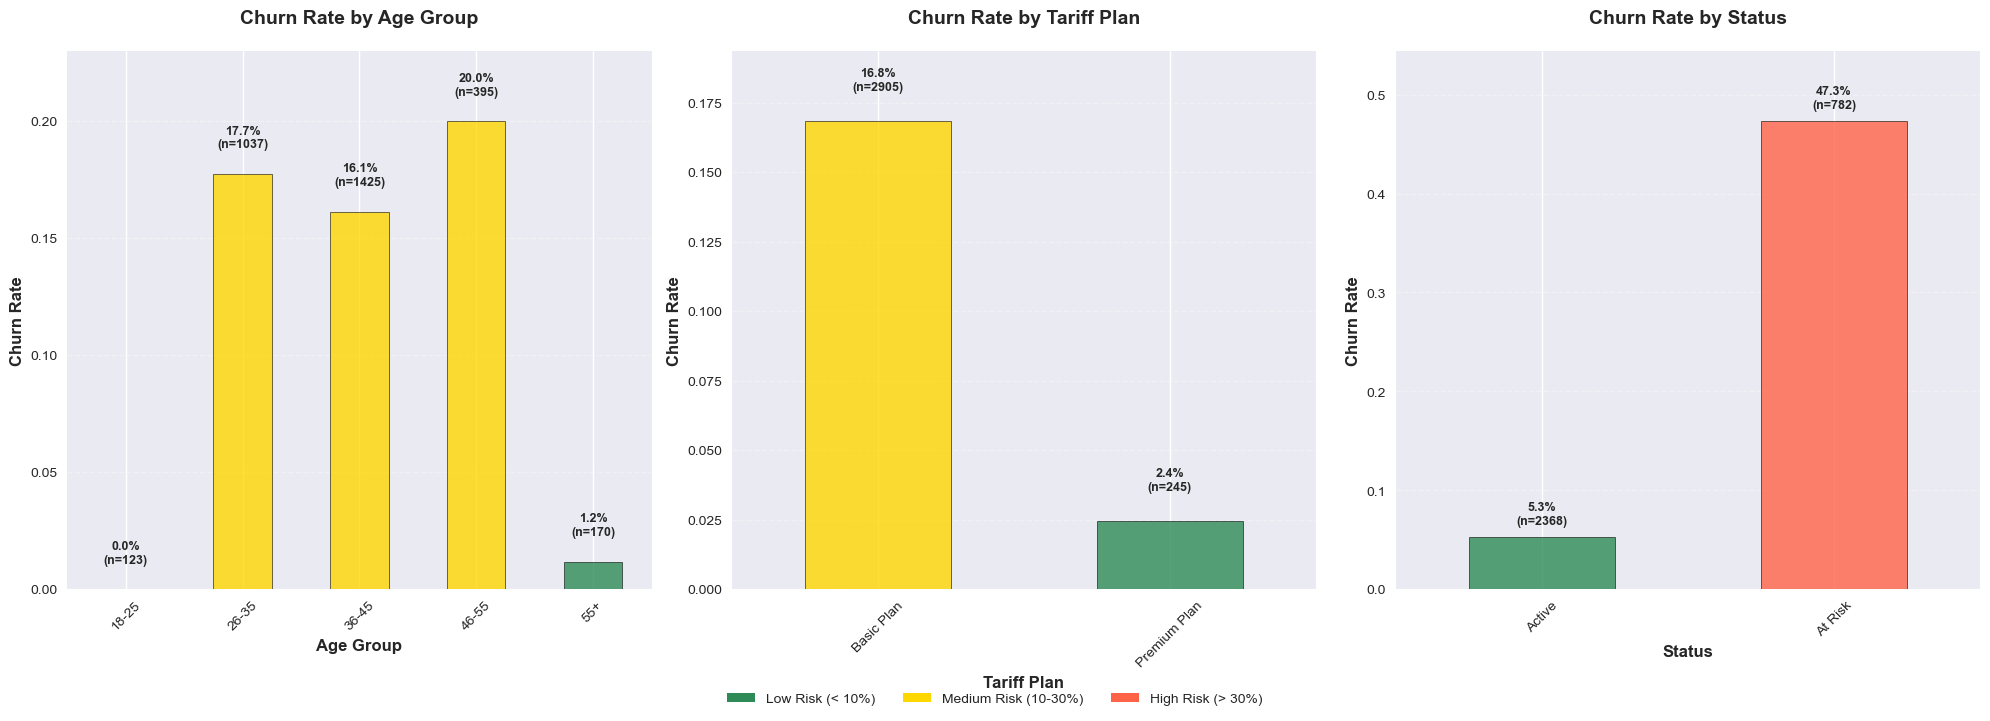


CHURN RATE SUMMARY BY CATEGORICAL FEATURES

AGE GROUP:
       Total Customers  Churned Customers  Churn Rate
18-25              123                  0      0.0000
26-35             1037                184      0.1774
36-45             1425                230      0.1614
46-55              395                 79      0.2000
55+                170                  2      0.0118

TARIFF PLAN:
              Total Customers  Churned Customers  Churn Rate
Basic Plan               2905                489      0.1683
Premium Plan              245                  6      0.0245

STATUS:
         Total Customers  Churned Customers  Churn Rate
Active              2368                125      0.0528
At Risk              782                370      0.4731


In [20]:
# Identify categorical columns
categorical_cols = ['Age Group', 'Tariff Plan', 'Status']

# Define descriptive labels for better interpretation
label_mappings = {
    'Age Group': {1: '18-25', 2: '26-35', 3: '36-45', 4: '46-55', 5: '55+'},
    'Tariff Plan': {1: 'Basic Plan', 2: 'Premium Plan'},
    'Status': {1: 'Active', 2: 'At Risk'}
}

# Define colors based on churn risk levels
colors = ['#2E8B57', '#FFD700', '#FF6347']  # Green, Yellow, Red for low, medium, high churn

# Churn rate by categorical features
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

for i, col in enumerate(categorical_cols):
    churn_rate = df.groupby(col)['Churn'].mean()
    
    # Create descriptive labels
    if col in label_mappings:
        labels = [label_mappings[col].get(x, str(x)) for x in churn_rate.index]
        churn_rate.index = labels
    
    # Color bars based on churn rate (risk level)
    bar_colors = []
    for rate in churn_rate.values:
        if rate < 0.1:  # Low churn (< 10%)
            bar_colors.append('#2E8B57')  # Green
        elif rate < 0.3:  # Medium churn (10-30%)
            bar_colors.append('#FFD700')  # Yellow
        else:  # High churn (> 30%)
            bar_colors.append('#FF6347')  # Red
    
    # Create the bar plot
    bars = churn_rate.plot(kind='bar', ax=axes[i], color=bar_colors, alpha=0.8, edgecolor='black', linewidth=0.5)
    
    # Customize the plot
    axes[i].set_title(f'Churn Rate by {col}', fontweight='bold', fontsize=14, pad=20)
    axes[i].set_ylabel('Churn Rate', fontweight='bold', fontsize=12)
    axes[i].set_xlabel(col, fontweight='bold', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)
    
    # Add grid for better readability
    axes[i].grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add value labels on bars with sample sizes
    for j, (idx, v) in enumerate(churn_rate.items()):
        sample_size = df[df[col] == churn_rate.index[j]].shape[0] if col not in label_mappings else df[df[col] == list(label_mappings[col].keys())[j]].shape[0]
        
        # Position label above bar
        axes[i].text(j, v + 0.01, f'{v:.1%}\n(n={sample_size})', 
                    ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    # Set y-axis limit to accommodate labels
    axes[i].set_ylim(0, max(churn_rate.values) * 1.15)

# Add a legend for color coding
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#2E8B57', label='Low Risk (< 10%)'),
    Patch(facecolor='#FFD700', label='Medium Risk (10-30%)'),
    Patch(facecolor='#FF6347', label='High Risk (> 30%)')
]
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.02), ncol=3, fontsize=10)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Make room for legend
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("CHURN RATE SUMMARY BY CATEGORICAL FEATURES")
print("="*60)

for col in categorical_cols:
    print(f"\n{col.upper()}:")
    churn_summary = df.groupby(col).agg({
        'Churn': ['count', 'sum', 'mean']
    }).round(4)
    churn_summary.columns = ['Total Customers', 'Churned Customers', 'Churn Rate']
    
    if col in label_mappings:
        churn_summary.index = [label_mappings[col].get(x, str(x)) for x in churn_summary.index]
    
    print(churn_summary)

## 5. Correlation Analysis

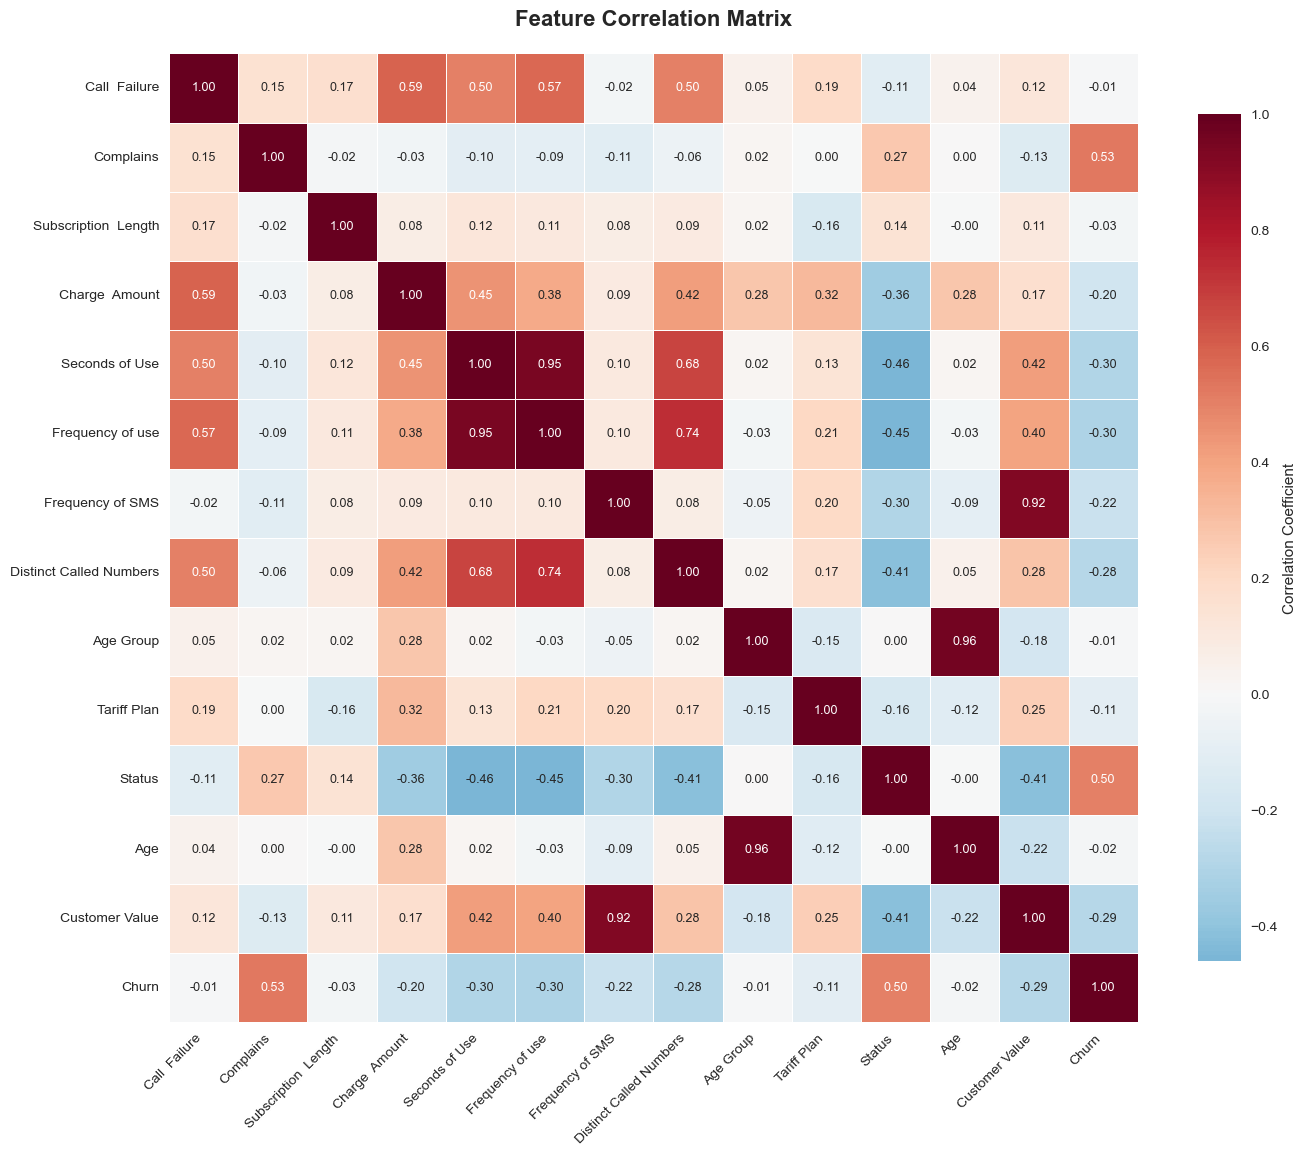


FEATURES MOST CORRELATED WITH CHURN
 1. Complains           :  0.532 ↑ Positive   (Strong)
 2. Status              :  0.499 ↑ Positive   (Strong)
 3. Frequency of use    : -0.303 ↓ Negative   (Strong)
 4. Seconds of Use      : -0.299 ↓ Negative   (Moderate)
 5. Customer Value      : -0.289 ↓ Negative   (Moderate)
 6. Distinct Called Numbers: -0.279 ↓ Negative   (Moderate)
 7. Frequency of SMS    : -0.221 ↓ Negative   (Moderate)
 8. Charge  Amount      : -0.202 ↓ Negative   (Moderate)
 9. Tariff Plan         : -0.106 ↓ Negative   (Moderate)
10. Subscription  Length: -0.033 ↓ Negative   (Weak)
11. Age                 : -0.018 ↓ Negative   (Weak)
12. Age Group           : -0.015 ↓ Negative   (Weak)
13. Call  Failure       : -0.009 ↓ Negative   (Weak)

HIGH CORRELATION PAIRS (Potential Multicollinearity)
• Age Group ↔ Age: 0.961
  → Consider removing one feature to avoid multicollinearity
• Seconds of Use ↔ Frequency of use: 0.946
  → Consider removing one feature to avoid multicollineari

In [26]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create improved visualization
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r',      # Better color scheme (red-blue)
            center=0,           # Center colormap at 0
            square=True,        # Square cells
            fmt='.2f',          # 2 decimal places
            cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
            linewidths=0.5,     # Add grid lines
            annot_kws={'size': 9})  # Annotation font size

plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

# Extract and analyze churn correlations
print('\n' + '='*60)
print('FEATURES MOST CORRELATED WITH CHURN')
print('='*60)

churn_corr = correlation_matrix['Churn'].drop('Churn').sort_values(key=abs, ascending=False)

for i, (feature, corr) in enumerate(churn_corr.items(), 1):
    direction = "↑ Positive" if corr > 0 else "↓ Negative"
    
    if abs(corr) > 0.3:
        strength = "Strong"
    elif abs(corr) > 0.1:
        strength = "Moderate"
    else:
        strength = "Weak"
    
    print(f"{i:2d}. {feature:20s}: {corr:6.3f} {direction:12s} ({strength})")

# Identify high correlation pairs (multicollinearity check)
print('\n' + '='*60)
print('HIGH CORRELATION PAIRS (Potential Multicollinearity)')
print('='*60)

high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.8 and correlation_matrix.columns[i] != 'Churn' and correlation_matrix.columns[j] != 'Churn':
            high_corr_pairs.append((correlation_matrix.columns[i], 
                                  correlation_matrix.columns[j], 
                                  corr_val))

if high_corr_pairs:
    for feat1, feat2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
        print(f"• {feat1} ↔ {feat2}: {corr:.3f}")
        print(f"  → Consider removing one feature to avoid multicollinearity")
else:
    print("No high correlation pairs found (threshold: 0.8)")

# Top positive and negative churn predictors
print('\n' + '='*60)
print('KEY CHURN INSIGHTS')
print('='*60)

positive_predictors = churn_corr[churn_corr > 0].head(3)
negative_predictors = churn_corr[churn_corr < 0].tail(3)

print("\nTOP POSITIVE PREDICTORS (Higher values = More churn):")
for feature, corr in positive_predictors.items():
    print(f"• {feature}: {corr:.3f}")

print("\nTOP NEGATIVE PREDICTORS (Higher values = Less churn):")
for feature, corr in negative_predictors.items():
    print(f"• {feature}: {corr:.3f}")

# Feature selection recommendations
print('\n' + '='*60)
print('FEATURE SELECTION RECOMMENDATIONS')
print('='*60)

important_features = churn_corr[abs(churn_corr) > 0.1].index.tolist()
print(f"\nRecommended features for modeling ({len(important_features)} features):")
for i, feature in enumerate(important_features, 1):
    corr_val = churn_corr[feature]
    print(f"{i:2d}. {feature} (correlation: {corr_val:.3f})")

weak_features = churn_corr[abs(churn_corr) <= 0.1].index.tolist()
if weak_features:
    print(f"\nFeatures with weak correlation (consider removing):")
    for feature in weak_features:
        corr_val = churn_corr[feature]
        print(f"• {feature} (correlation: {corr_val:.3f})")

## 6. Usage Patterns Analysis

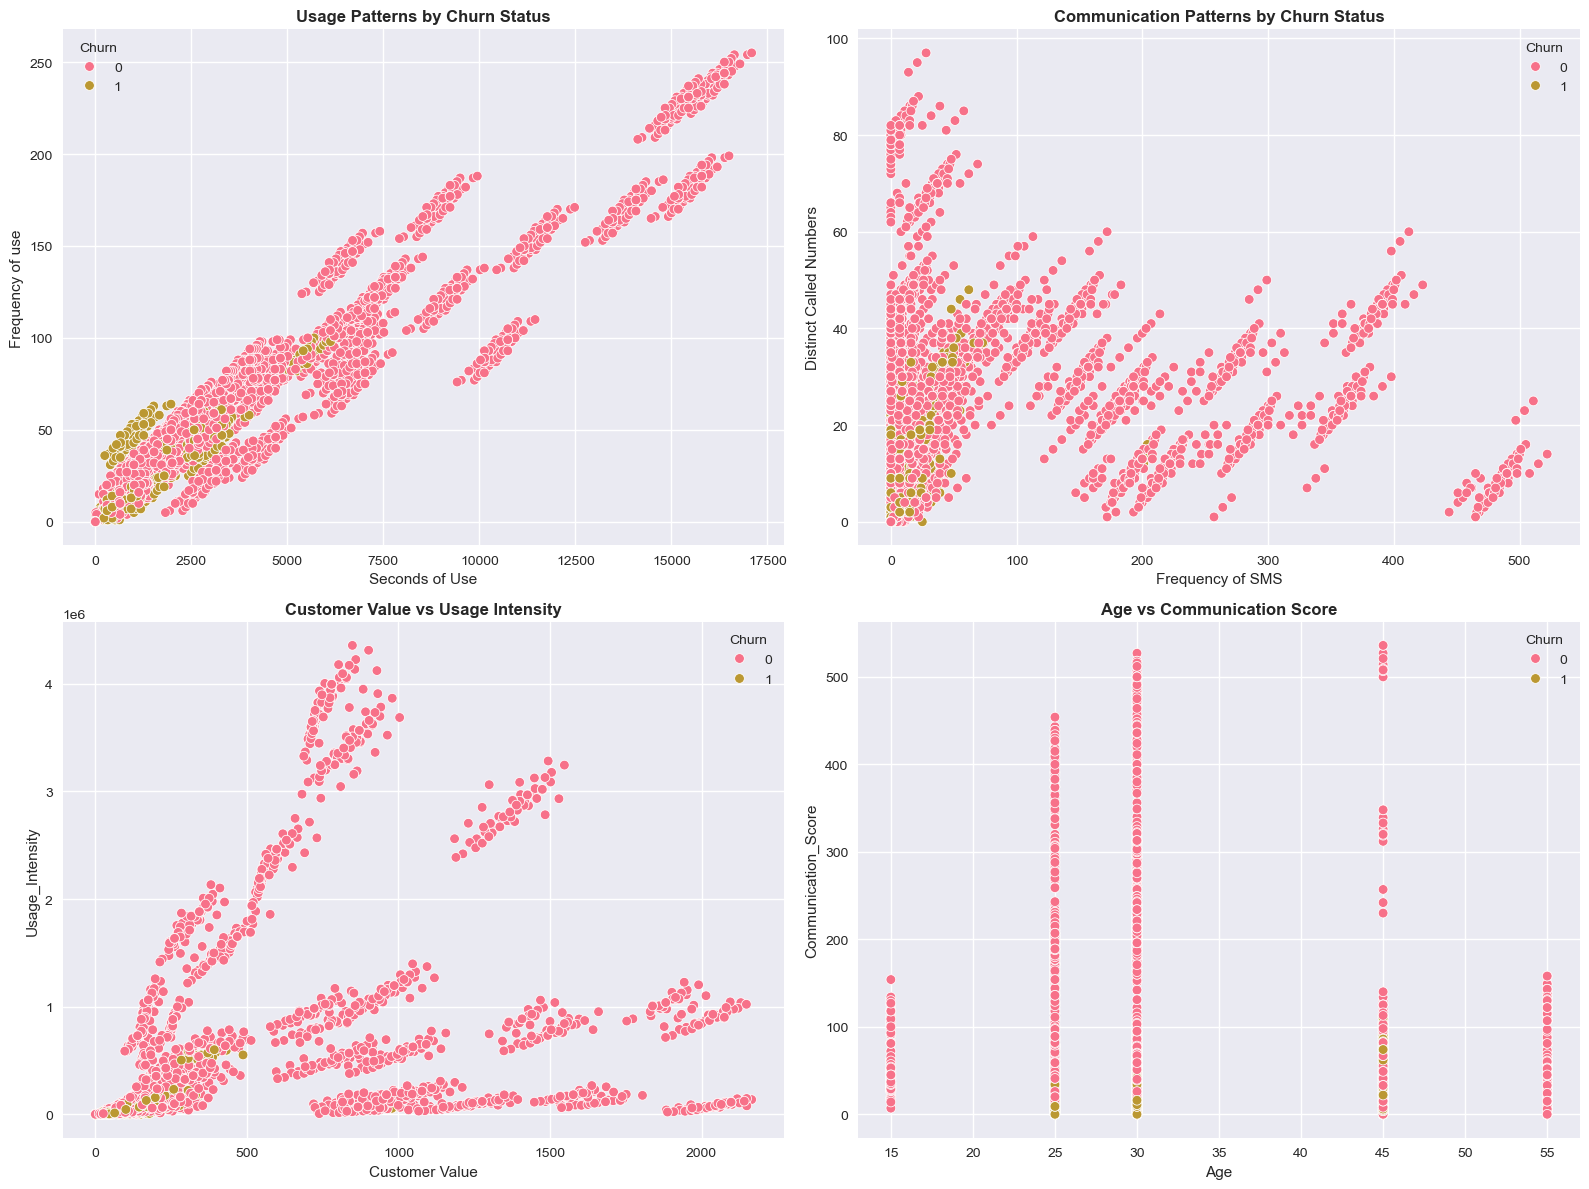

In [27]:
# Usage intensity analysis
df['Usage_Intensity'] = df['Seconds of Use'] * df['Frequency of use']
df['Communication_Score'] = df['Frequency of SMS'] + df['Distinct Called Numbers']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Usage vs Churn
sns.scatterplot(data=df, x='Seconds of Use', y='Frequency of use', hue='Churn', ax=axes[0,0])
axes[0,0].set_title('Usage Patterns by Churn Status', fontweight='bold')

# Communication patterns
sns.scatterplot(data=df, x='Frequency of SMS', y='Distinct Called Numbers', hue='Churn', ax=axes[0,1])
axes[0,1].set_title('Communication Patterns by Churn Status', fontweight='bold')

# Customer value vs usage
sns.scatterplot(data=df, x='Customer Value', y='Usage_Intensity', hue='Churn', ax=axes[1,0])
axes[1,0].set_title('Customer Value vs Usage Intensity', fontweight='bold')

# Age vs usage
sns.scatterplot(data=df, x='Age', y='Communication_Score', hue='Churn', ax=axes[1,1])
axes[1,1].set_title('Age vs Communication Score', fontweight='bold')

plt.tight_layout()
plt.show()

## 7. Key Insights Summary

In [31]:
print('EDA KEY INSIGHTS:')
print('=' * 20)

print('1. Dataset Overview:')
print(f'   • Total customers: {len(df):,}')
print(f'   • Churn rate: {df["Churn"].mean():.2%}')
print(f'   • Features: {len(df.columns)} total')

print('2. Data Quality:')
print(f'   • Missing values: {df.isnull().sum().sum()}')
print(f'   • Duplicate rows: {df.duplicated().sum()}')

print('3. Top Churn Predictors:')
top_predictors = churn_corr.head(4)
for feature, corr in top_predictors.items():
    if feature != 'Churn':
        print(f'   • {feature}: {corr:.3f}')

EDA KEY INSIGHTS:
1. Dataset Overview:
   • Total customers: 3,150
   • Churn rate: 15.71%
   • Features: 16 total
2. Data Quality:
   • Missing values: 0
   • Duplicate rows: 300
3. Top Churn Predictors:
   • Complains: 0.532
   • Status: 0.499
   • Frequency of use: -0.303
   • Seconds of Use: -0.299
